In [1]:
import requests

ticker = 'AAPL'
start = '2021-12-31'
end = '2023-01-20'
api_key = 'rW1fMPt5T8N4lrq6J4HM58LKZj1VBoPl'
url = 'https://api.polygon.io/v2/aggs/ticker/' + ticker + '/range/1/day/' + start + '/' + end + '?adjusted=true&sort=asc&limit=120&apiKey=' + api_key

response = requests.get(url).json()

print(response)

{'ticker': 'AAPL', 'queryCount': 120, 'resultsCount': 120, 'adjusted': True, 'results': [{'v': 106754551.0, 'vw': 170.2886, 'o': 169.08, 'c': 172.19, 'h': 172.5, 'l': 168.17, 't': 1641790800000, 'n': 956337}, {'v': 76138312.0, 'vw': 173.6337, 'o': 172.32, 'c': 175.08, 'h': 175.18, 'l': 170.82, 't': 1641877200000, 'n': 649652}, {'v': 74805173.0, 'vw': 175.8343, 'o': 176.12, 'c': 175.53, 'h': 177.18, 'l': 174.82, 't': 1641963600000, 'n': 642756}, {'v': 84405760.0, 'vw': 173.9711, 'o': 175.78, 'c': 172.19, 'h': 176.62, 'l': 171.79, 't': 1642050000000, 'n': 692343}, {'v': 80440778.0, 'vw': 172.3612, 'o': 171.34, 'c': 173.07, 'h': 173.78, 'l': 171.09, 't': 1642136400000, 'n': 672552}, {'v': 91063979.0, 'vw': 170.5404, 'o': 171.51, 'c': 169.8, 'h': 172.54, 'l': 169.405, 't': 1642482000000, 'n': 780899}, {'v': 94814990.0, 'vw': 168.2999, 'o': 170, 'c': 166.23, 'h': 171.08, 'l': 165.94, 't': 1642568400000, 'n': 824022}, {'v': 91420515.0, 'vw': 167.0706, 'o': 166.98, 'c': 164.51, 'h': 169.68, '

In [34]:
import pandas as pd
from datetime import datetime, date, timedelta


results = pd.DataFrame.from_dict(response['results'])
results.columns = ['volume', 'vwap', 'open', 'close', 'high', 'low', 'timestamp', 'n']

results.head()

,volume,vwap,open,close,high,low,timestamp,n
0,106754551.0,170.2886,169.08,172.19,172.50,168.17,1641790800000,956337
1,76138312.0,173.6337,172.32,175.08,175.18,170.82,1641877200000,649652
2,74805173.0,175.8343,176.12,175.53,177.18,174.82,1641963600000,642756
3,84405760.0,173.9711,175.78,172.19,176.62,171.79,1642050000000,692343
4,80440778.0,172.3612,171.34,173.07,173.78,171.09,1642136400000,672552


In [35]:
results['date'] = results.timestamp.apply(lambda i: date.fromtimestamp(i/1000))

results = results[['volume', 'vwap', 'open', 'close', 'high', 'low', 'date', 'n']].set_index('date')
results.head()

,volume,vwap,open,close,high,low,n
date,,,,,,,
2022-01-10,106754551.0,170.2886,169.08,172.19,172.50,168.17,956337
2022-01-11,76138312.0,173.6337,172.32,175.08,175.18,170.82,649652
2022-01-12,74805173.0,175.8343,176.12,175.53,177.18,174.82,642756
2022-01-13,84405760.0,173.9711,175.78,172.19,176.62,171.79,692343
2022-01-14,80440778.0,172.3612,171.34,173.07,173.78,171.09,672552


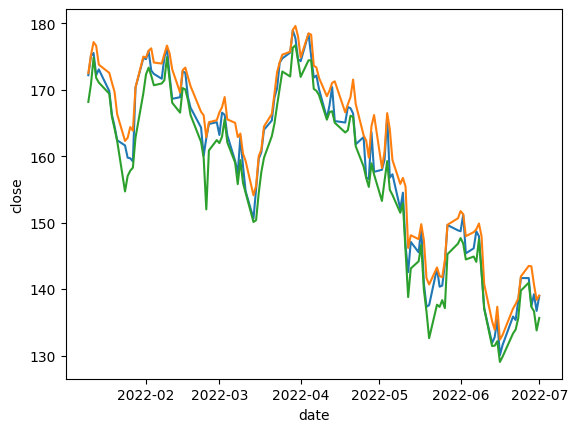

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lineplot(data = results, x = 'date', y = 'close');
sns.lineplot(data = results, x = 'date', y = 'high');
sns.lineplot(data = results, x = 'date', y = 'low');

In [37]:
results.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, 2022-01-10 to 2022-07-01
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   volume  120 non-null    float64
 1   vwap    120 non-null    float64
 2   open    120 non-null    float64
 3   close   120 non-null    float64
 4   high    120 non-null    float64
 5   low     120 non-null    float64
 6   n       120 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 11.6+ KB


In [38]:
import numpy as np

np.std(results.close)

13.2426638548376

In [47]:
def close_price_range(start, n):
    ''' returns a range of dates, starting on the 'start' date and stretching back 'n' days '''
    date_object = datetime.strptime(start, "%Y-%m-%d").date()
    delta = timedelta(n)
    return results.close[date_object - delta : date_object]

In [48]:
close_price_range("2022-06-15", 60)

date
2022-04-18    165.07
2022-04-19    167.40
2022-04-20    167.23
2022-04-21    166.42
2022-04-22    161.79
2022-04-25    162.88
2022-04-26    156.80
2022-04-27    156.57
2022-04-28    163.64
2022-04-29    157.65
2022-05-02    157.96
2022-05-03    159.48
2022-05-04    166.02
2022-05-05    156.77
2022-05-06    157.28
2022-05-09    152.06
2022-05-10    154.51
2022-05-11    146.50
2022-05-12    142.56
2022-05-13    147.11
2022-05-16    145.54
2022-05-17    149.24
2022-05-18    140.82
2022-05-19    137.35
2022-05-20    137.59
2022-05-23    143.11
2022-05-24    140.36
2022-05-25    140.52
2022-05-26    143.78
2022-05-27    149.64
2022-05-31    148.84
2022-06-01    148.71
2022-06-02    151.21
2022-06-03    145.38
2022-06-06    146.14
2022-06-07    148.71
2022-06-08    147.96
2022-06-09    142.64
2022-06-10    137.13
2022-06-13    131.88
2022-06-14    132.76
2022-06-15    135.43
Name: close, dtype: float64

In [52]:
def close_price_std(start, n):
    ''' returns a range of dates, starting on the 'start' date and stretching back 'n' days '''
    date_object = datetime.strptime(start, "%Y-%m-%d").date()
    delta = timedelta(n)
    return np.std(results.close[date_object - delta : date_object])

In [53]:
close_price_std("2022-06-15", 60)

9.921029749603465

In [54]:
def close_price_range(start, n):
    ''' returns a range of dates, starting on the 'start' date and stretching 
    back 'n' days '''
    delta = timedelta(n)
    return results.close[start - delta : start]

In [56]:
for i in results.close[60:].index:
    print(np.std(close_price_range(i, 60)))

7.014072770989385
6.968012140166354
6.89871149186092
6.801102551672587
6.756498089980438
6.7720446273909145
6.697980887691208
6.733759434473164
6.725514622417189
6.725341749961671
6.644842394081058
6.6066719476529805
6.625366138857756
6.767822046229726
6.930049838178451
6.860258223131809
6.900156244488027
7.154747088171016
7.220482506757114
7.209634364126873
7.2536195697850925
7.2764443732459165
7.560703799919248
7.672223500092666
8.037701877646551
8.643607196991246
8.935366641300332
9.219495441824032
9.49132548525864
10.137707123685493
10.773553285969522
11.30452272496527
11.807168536735439
12.073112590340887
12.256711891635447
12.356245187454968
12.304518034022575
11.471773112567316
11.228582049764992
11.126520913132977
11.126666291313299
10.177460697358743
9.837796651213349
9.553665161862494
9.587359438225542
9.786965896550816
9.601894022956017
9.764271606218253
9.921029749603465
10.266254001713119
10.505861242875113
9.48936791313514
9.38473247824789
9.361322972766912
9.280723417374

In [57]:
ticker = 'AAPL'
api_key = 'rW1fMPt5T8N4lrq6J4HM58LKZj1VBoPl'
url = 'https://api.polygon.io/vX/reference/financials?ticker=' + ticker + '&timeframe=quarterly&include_sources=true&apiKey=' + api_key

fundamentals = requests.get(url).json()

fundamentals

{'results': [{'financials': {'balance_sheet': {'current_assets': {'label': 'Current Assets',
      'value': 128777000000.0,
      'unit': 'USD',
      'order': 200,
      'xpath': "//*[local-name()='AssetsCurrent' and @id='id3VybDovL2RvY3MudjEvZG9jOmUwNTI5OTE5NjMxODRiNmI4ZDhlODg4MTk3ODBkZmM0L3NlYzplMDUyOTkxOTYzMTg0YjZiOGQ4ZTg4ODE5NzgwZGZjNF8yMi9mcmFnOjlkZDMzZWM3YTM1NzQ5OTE4YTU3ZWRlZGUyM2NmMmFmL3RhYmxlOjA1OTEyZTU2ODVjZTRiNTI5NWUwMmE2MGU3OTAxNDI3L3RhYmxlcmFuZ2U6MDU5MTJlNTY4NWNlNGI1Mjk1ZTAyYTYwZTc5MDE0MjdfOS0xLTEtMS04NjY4Nw_b086d40d-8964-45e3-935e-9ab336c91dee']"},
     'fixed_assets': {'label': 'Fixed Assets',
      'value': 42951000000.0,
      'unit': 'USD',
      'order': 400,
      'xpath': "//*[local-name()='PropertyPlantAndEquipmentNet' and @id='id3VybDovL2RvY3MudjEvZG9jOmUwNTI5OTE5NjMxODRiNmI4ZDhlODg4MTk3ODBkZmM0L3NlYzplMDUyOTkxOTYzMTg0YjZiOGQ4ZTg4ODE5NzgwZGZjNF8yMi9mcmFnOjlkZDMzZWM3YTM1NzQ5OTE4YTU3ZWRlZGUyM2NmMmFmL3RhYmxlOjA1OTEyZTU2ODVjZTRiNTI5NWUwMmE2MGU3OTAxNDI3L3RhYmxlcmFuZ2U

In [58]:
fundamentals.keys()

dict_keys(['results', 'status', 'request_id', 'count', 'next_url'])

In [63]:
fundamentals['results'][0].keys()

dict_keys(['financials', 'start_date', 'end_date', 'filing_date', 'cik', 'company_name', 'fiscal_period', 'fiscal_year', 'source_filing_url', 'source_filing_file_url'])

In [64]:
fundamentals['results'][0]['cik']

'0000320193'

In [66]:
fundamentals['results'][0]['financials'].keys()

dict_keys(['balance_sheet', 'cash_flow_statement', 'comprehensive_income', 'income_statement'])

In [67]:
fundamentals['results'][0]['financials']['comprehensive_income'].keys()

dict_keys(['other_comprehensive_income_loss', 'comprehensive_income_loss_attributable_to_parent', 'other_comprehensive_income_loss_attributable_to_parent', 'comprehensive_income_loss', 'comprehensive_income_loss_attributable_to_noncontrolling_interest'])

In [68]:
fundamentals['results'][0]['financials']['income_statement'].keys()

dict_keys(['income_tax_expense_benefit', 'basic_earnings_per_share', 'participating_securities_distributed_and_undistributed_earnings_loss_basic', 'diluted_earnings_per_share', 'operating_income_loss', 'interest_expense_operating', 'costs_and_expenses', 'net_income_loss_attributable_to_noncontrolling_interest', 'income_loss_from_continuing_operations_before_tax', 'benefits_costs_expenses', 'nonoperating_income_loss', 'net_income_loss_available_to_common_stockholders_basic', 'preferred_stock_dividends_and_other_adjustments', 'revenues', 'net_income_loss_attributable_to_parent', 'income_loss_from_continuing_operations_after_tax', 'net_income_loss', 'operating_expenses', 'gross_profit', 'cost_of_revenue'])

In [72]:
pd.DataFrame.from_dict(fundamentals['results'][0]['financials']['income_statement']).T.sort_values(by = 'order')

,label,value,unit,order,xpath,formula
revenues,Revenues,117154000000.0,USD,100,//*[local-name()='RevenueFromContractWithCusto...,NaN
benefits_costs_expenses,Benefits Costs and Expenses,81531000000.0,USD,200,NaN,IS-Impute-202
cost_of_revenue,Cost Of Revenue,66822000000.0,USD,300,//*[local-name()='CostOfGoodsAndServicesSold' ...,NaN
costs_and_expenses,Costs And Expenses,81531000000.0,USD,600,NaN,IS-Impute-102
gross_profit,Gross Profit,50332000000.0,USD,800,//*[local-name()='GrossProfit' and @id='id3Vyb...,NaN
nonoperating_income_loss,Nonoperating Income/Loss,-393000000.0,USD,900,//*[local-name()='NonoperatingIncomeExpense' a...,NaN
operating_expenses,Operating Expenses,14316000000.0,USD,1000,//*[local-name()='OperatingExpenses' and @id='...,NaN
operating_income_loss,Operating Income/Loss,36016000000.0,USD,1100,//*[local-name()='OperatingIncomeLoss' and @id...,NaN
income_loss_from_continuing_operations_after_tax,Income/Loss From Continuing Operations After Tax,29998000000.0,USD,1400,NaN,IS-Impute-04
income_loss_from_continuing_operations_before_tax,Income/Loss From Continuing Operations Before Tax,35623000000.0,USD,1500,//*[local-name()='IncomeLossFromContinuingOper...,NaN
